In [1]:
%pip install yfinance pandas matplotlib

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/ba/d0/d482c39cee2ab2978a892558cf130681d4574ea208e162da8958b31e9250/frozendict-2.4.6-py312-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     -- ------------------------------------- 0.2/3.0 MB 5.9 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 7.5 MB/s eta 0:00:01
     ------------- -------------------------- 1.1/3.0 MB 7.5 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 8


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ticker = "AAPL"
start_date = "2023-01-01"
end_date = "2025-03-01"
stock_data = yf.download(ticker,start_date,end=end_date)
stock_data.to_csv("AAPL_stock_data.csv")
print(stock_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.632523  129.395510  122.742865  128.782641  112117500
2023-01-04  124.907715  127.181283  123.642427  125.431622   89113600
2023-01-05  123.583099  126.301493  123.326093  125.668849   80962700
2023-01-06  128.130203  128.792501  123.454572  124.561702   87754700
2023-01-09  128.654144  131.876686  128.397138  128.970474   70790800


In [5]:
print("Data set shape ",stock_data.shape)

Data set shape  (541, 5)


In [6]:
print(stock_data.describe())

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   541.000000  541.000000  541.000000  541.000000  5.410000e+02
mean    192.309393  193.883160  190.454177  192.036779  5.778716e+07
std      29.885142   30.119642   29.551135   29.886695  2.473694e+07
min     123.583099  126.301493  122.742865  124.561702  2.323470e+07
25%     171.808746  172.846884  169.992855  171.364009  4.468600e+07
50%     186.503082  187.783307  185.428717  186.728906  5.245640e+07
75%     222.230896  224.745359  219.890965  222.121137  6.475140e+07
max     258.735504  259.814335  257.347047  257.906429  3.186799e+08


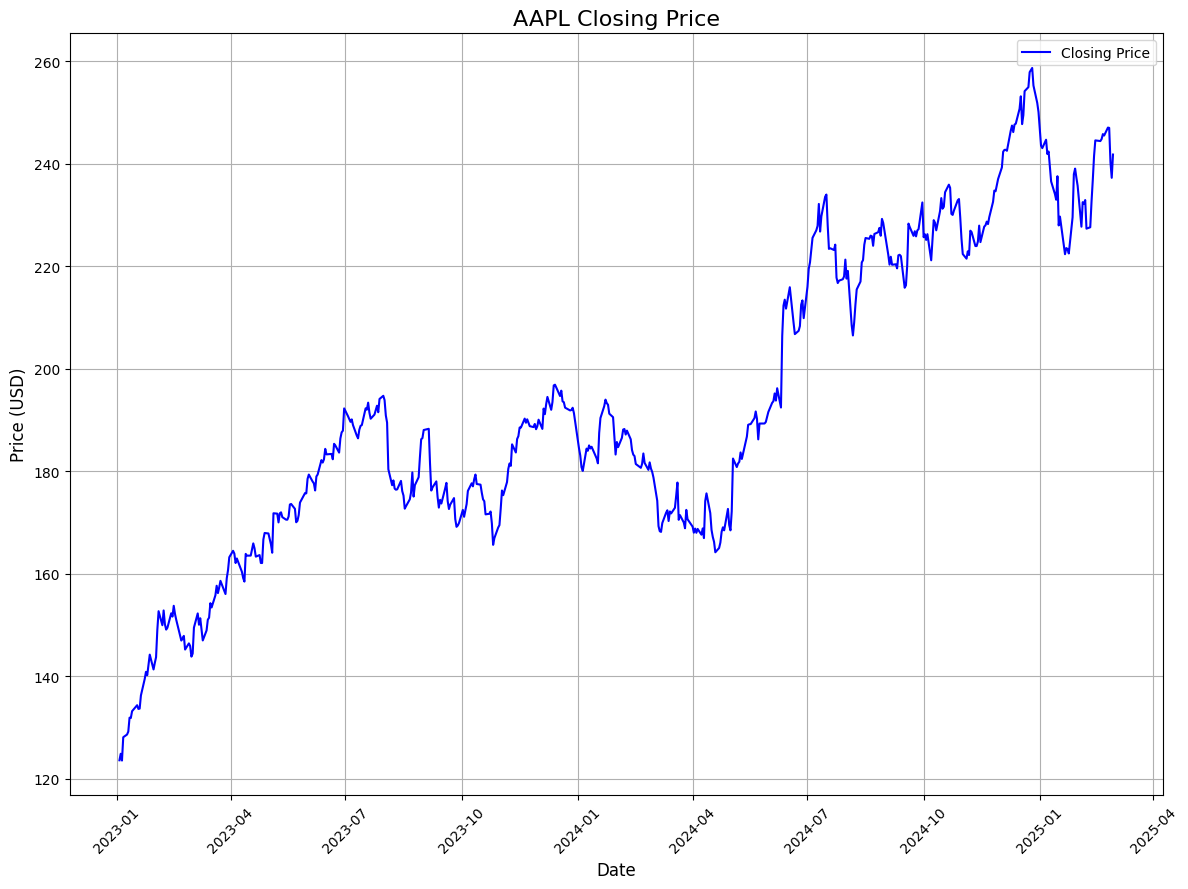

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(stock_data.index,stock_data['Close'],label="Closing Price",color="blue")
plt.title("AAPL Closing Price",fontsize=16)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Price (USD)',fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
%pip install mplfinance
# https://github.com/matplotlib/mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


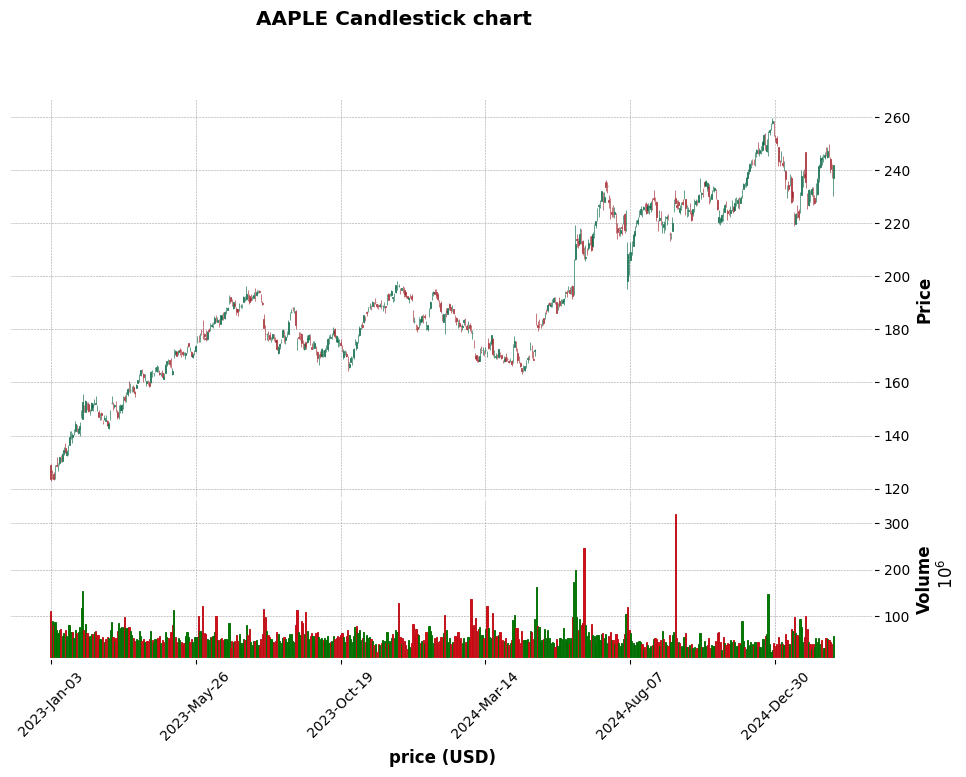

In [10]:
import mplfinance as mpf 

stock_data.columns = stock_data.columns.get_level_values(0)

mpf.plot(stock_data,type='candle',style='charles',title='AAPLE Candlestick chart',
         xlabel = "price (USD)",volume=True,
         ylabel_lower='Volume',figsize=(12,8))

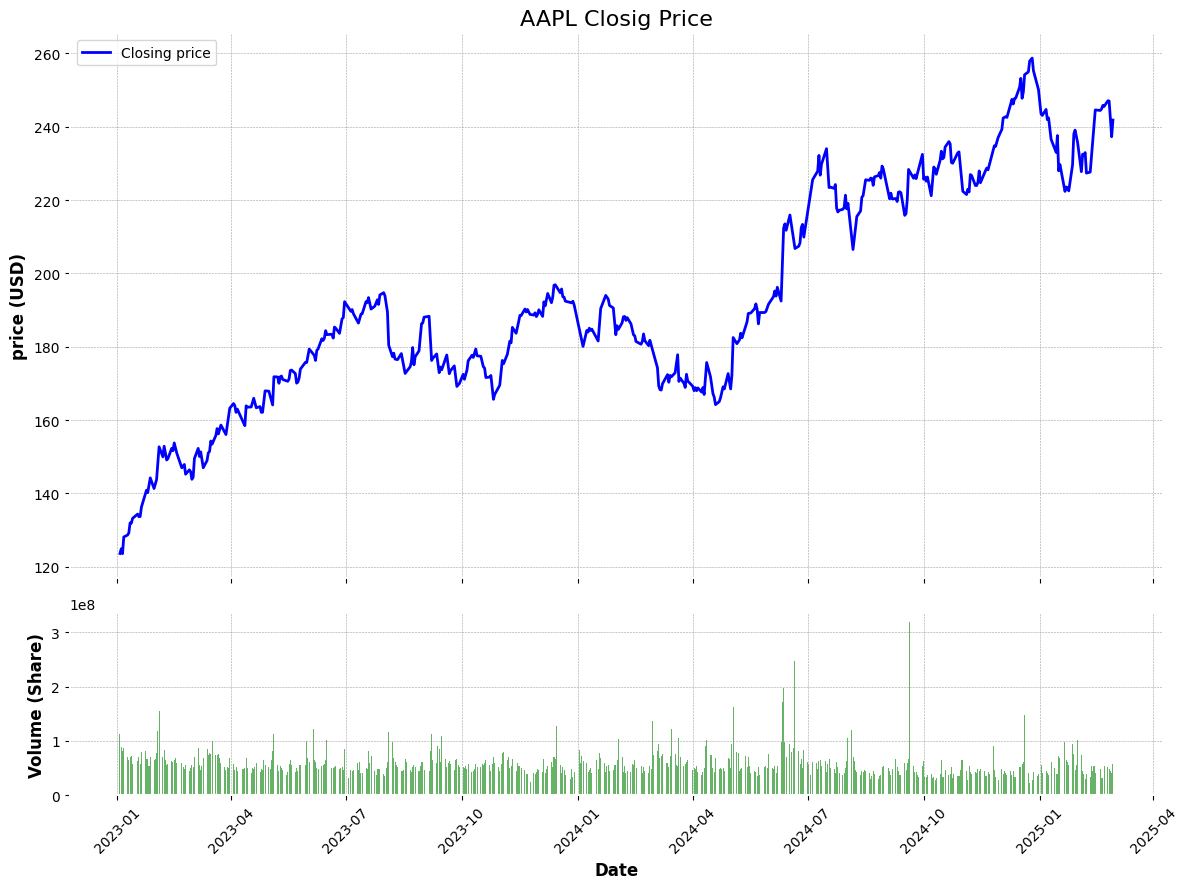

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,9),sharex=True, gridspec_kw ={'height_ratios':[3,1]})
ax1.plot(stock_data.index,stock_data['Close'],label='Closing price',color='blue')
ax1.set_title('AAPL Closig Price',fontsize=16)
ax1.set_ylabel('price (USD)',fontsize=12)
ax1.grid(True)
ax1.legend()

ax2.bar(stock_data.index,stock_data['Volume'],color="green",alpha=0.6)
ax2.set_xlabel('Date',fontsize=12)
ax2.set_ylabel('Volume (Share)',fontsize=12)
ax2.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()